# Milestone 2

### Avant de commencer. Merci de lire bien attentivement le README.md pour cette seconde partie.

In [1]:
from src.models import model_start

import config
%load_ext autoreload
%autoreload 2

In [2]:
# all imports
from src import *
import pandas as pd
import os.path

## Data acquisition

In [3]:
filename = './data/dataframe_2016_to_2019.csv'
start_year = 2016
end_year = 2019

if not os.path.isfile(filename):
    # Get the data from the NHL API (2016 - 2019)
    nhl_data_provider = get_data_from(start_year, end_year)

    # Clean the data
    clean_regular_season, clean_playoff = clean_data(nhl_data_provider)

    # Transform data into dataframe
    df_2016_to_2019 = convert_dictionaries_to_dataframes(clean_regular_season,
                                                         clean_playoff,
                                                         np.arange(start_year, end_year + 1).tolist())
    df_2016_to_2019.to_csv(filename, index=False)

#### Récupération des données d'entraînement

In [4]:
train_data = pd.read_csv(filename)

train_data

,Year,idGame,gameType,periodType,numberPeriod,typeDescKey,eventOwnerTeam,gameSeconds,previousEventType,timeSinceLastEvent,...,emptyGoalNet,isGoalAdvantage,isGoal,shotDistance,distanceFromLastEvent,rebound,speedFromLastEvent,shotAngle,reboundAngleShot,offensivePressureTime
0,2016,2016020001,regular-season,REG,1,shot-on-goal,Maple Leafs,71,blocked-shot,1.0,...,0,Neutral,0,13.0,17.1,False,17.100000,22.619865,0.0,0.0
1,2016,2016020001,regular-season,REG,1,shot-on-goal,Senators,173,giveaway,5.0,...,0,Neutral,0,13.3,36.7,False,7.340000,77.005383,0.0,0.0
2,2016,2016020001,regular-season,REG,1,shot-on-goal,Senators,241,missed-shot,18.0,...,0,Neutral,0,76.2,102.3,False,5.683333,29.931512,0.0,68.0
3,2016,2016020001,regular-season,REG,1,shot-on-goal,Senators,286,missed-shot,19.0,...,0,Neutral,0,58.0,45.9,False,2.415789,14.995079,0.0,45.0
4,2016,2016020001,regular-season,REG,1,shot-on-goal,Maple Leafs,406,hit,16.0,...,0,Neutral,0,61.7,81.2,False,5.075000,26.980231,0.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327337,2019,2019030416,playoffs,REG,3,shot-on-goal,Lightning,3361,giveaway,3.0,...,0,Disadvantage,0,38.4,123.0,False,41.000000,38.659808,0.0,450.0
327338,2019,2019030416,playoffs,REG,3,shot-on-goal,Lightning,3440,blocked-shot,2.0,...,0,Disadvantage,0,8.5,3.2,False,1.600000,20.556045,0.0,79.0
327339,2019,2019030416,playoffs,REG,3,shot-on-goal,Stars,3530,takeaway,8.0,...,0,Advantage,0,55.3,58.9,False,7.362500,6.225829,0.0,203.0
327340,2019,2019030416,playoffs,REG,3,shot-on-goal,Stars,3567,faceoff,5.0,...,0,Advantage,0,58.9,49.7,False,9.940000,9.782407,0.0,37.0


# Ingénierie des caractéristiques I

## Question 1

In [5]:
count_table = pd.crosstab(train_data['isGoal'], train_data['typeDescKey'])
# count_table2 = pd.crosstab(train_data['emptyGoalNet_0_1'],train_data['emptyGoalNet'])

count_table
# count_table2

typeDescKey,goal,shot-on-goal
isGoal,,
0,0,296406
1,30936,0


#### Histogramme du nombre de tirs (buts et non-buts séparés), regroupés par distance

##### Variables distance de tir et angle de tir regroupées

In [6]:
# Binning de la distance en intervalles de 20 pieds
train_data.loc[:,'shotDistance_bin'] = pd.cut(train_data['shotDistance'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200'])

train_data.loc[:,'shotAngle_bin'] = pd.cut(train_data['shotAngle'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180], labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179'])


train_data


,Year,idGame,gameType,periodType,numberPeriod,typeDescKey,eventOwnerTeam,gameSeconds,previousEventType,timeSinceLastEvent,...,isGoal,shotDistance,distanceFromLastEvent,rebound,speedFromLastEvent,shotAngle,reboundAngleShot,offensivePressureTime,shotDistance_bin,shotAngle_bin
0,2016,2016020001,regular-season,REG,1,shot-on-goal,Maple Leafs,71,blocked-shot,1.0,...,0,13.0,17.1,False,17.100000,22.619865,0.0,0.0,0-19,20-39
1,2016,2016020001,regular-season,REG,1,shot-on-goal,Senators,173,giveaway,5.0,...,0,13.3,36.7,False,7.340000,77.005383,0.0,0.0,0-19,60-79
2,2016,2016020001,regular-season,REG,1,shot-on-goal,Senators,241,missed-shot,18.0,...,0,76.2,102.3,False,5.683333,29.931512,0.0,68.0,60-79,20-39
3,2016,2016020001,regular-season,REG,1,shot-on-goal,Senators,286,missed-shot,19.0,...,0,58.0,45.9,False,2.415789,14.995079,0.0,45.0,40-59,0-19
4,2016,2016020001,regular-season,REG,1,shot-on-goal,Maple Leafs,406,hit,16.0,...,0,61.7,81.2,False,5.075000,26.980231,0.0,335.0,60-79,20-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327337,2019,2019030416,playoffs,REG,3,shot-on-goal,Lightning,3361,giveaway,3.0,...,0,38.4,123.0,False,41.000000,38.659808,0.0,450.0,20-39,20-39
327338,2019,2019030416,playoffs,REG,3,shot-on-goal,Lightning,3440,blocked-shot,2.0,...,0,8.5,3.2,False,1.600000,20.556045,0.0,79.0,0-19,20-39
327339,2019,2019030416,playoffs,REG,3,shot-on-goal,Stars,3530,takeaway,8.0,...,0,55.3,58.9,False,7.362500,6.225829,0.0,203.0,40-59,0-19
327340,2019,2019030416,playoffs,REG,3,shot-on-goal,Stars,3567,faceoff,5.0,...,0,58.9,49.7,False,9.940000,9.782407,0.0,37.0,40-59,0-19


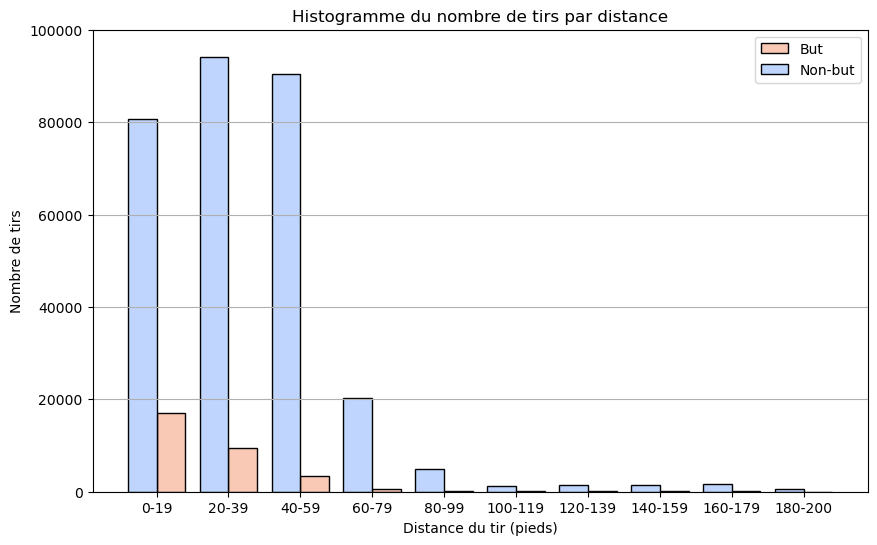

In [8]:
## Add in advancedVisualisation (by Youry)
def histogram_2_variables_binned(df, x_bin, hue, shrink, xlabel, ylabel, title, legendTitle, legendLabels):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=x_bin, hue=hue, multiple='dodge', palette='coolwarm', shrink=shrink)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,100000)
    plt.title(title)
    plt.legend(title=legendTitle, labels=legendLabels)
    plt.grid(axis="y")
    plt.show()


histogram_2_variables_binned(df=train_data, x_bin='shotDistance_bin', hue='isGoal', shrink=0.8, xlabel='Distance du tir (pieds)', ylabel='Nombre de tirs', title='Histogramme du nombre de tirs par distance', legendTitle='', legendLabels=['But', 'Non-but'])

#### Histogramme du nombre de tirs (buts et non-buts séparés), regroupés par angle

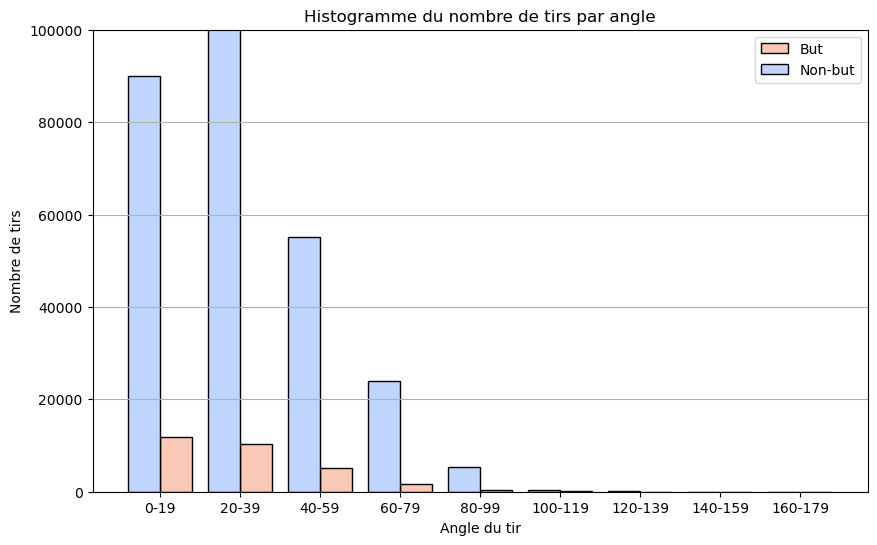

In [9]:
histogram_2_variables_binned(df=train_data, x_bin='shotAngle_bin', hue='isGoal', shrink=0.8, xlabel='Angle du tir', ylabel='Nombre de tirs', title='Histogramme du nombre de tirs par angle', legendTitle='', legendLabels=['But', 'Non-but'])

#### Histogramme 2D où un axe est la distance et l'autre est l'angle (sans distinction entre buts et non-buts)

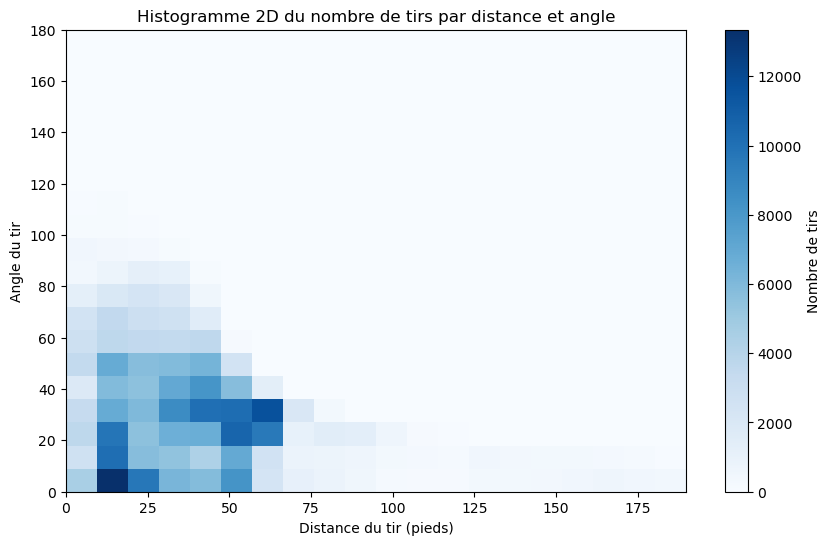

In [12]:
def histogram2D_2_variables(df, x, y, bins, label, xlabel, ylabel, title):
    # Remove rows with NaN values
    df = df.dropna(subset=[x, y])
    # Plot the histogram with hue for 'is_goal'
    plt.figure(figsize=(10, 6))
    plt.hist2d(df[x], df[y], bins=bins, cmap='Blues')
    # Customize legend labels for hue values
    plt.colorbar(label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

histogram2D_2_variables(train_data, x='shotDistance', y='shotAngle', bins=20, label='Nombre de tirs', xlabel='Distance du tir (pieds)', ylabel='Angle du tir', title='Histogramme 2D du nombre de tirs par distance et angle')

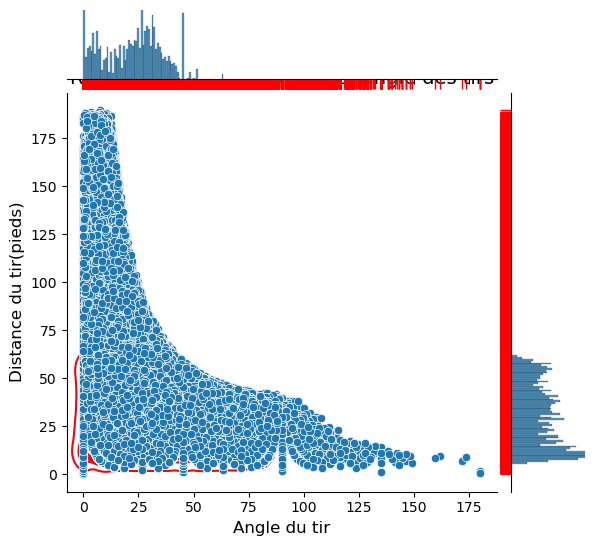

In [26]:
def histogram2D_2_variables_seaborn(df, x, y, title, xlabel, ylabel, kind):
    # Remove rows with NaN values
    df = df.dropna(subset=[x, y])
    # Jointplot to visualize the 2D histogram
    sns.jointplot(data=df, x=x, y=y, kind=kind, cmap='Blues')
    # Add title and labels
    plt.suptitle(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Show the plot
    plt.show()


# histogram2D_2_variables_seaborn(train_data, x='shotDistance', y='shotAngle', title="Histogramme 2D de la Distance et de l'Angle", xlabel='Distance du tir (pieds)', ylabel='Angle du tir',
#                         kind='kde'
#                         # kind='reg'
#                         # kind='hist'
#                         # kind='hex'
# )


g = sns.jointplot(data=train_data, x='shotAngle', y='shotDistance')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# Ajouter un titre, un xlabel, et un ylabel
g.ax_joint.set_title("Relation entre la distance et l'angle des tirs", fontsize=14)
g.ax_joint.set_xlabel("Angle du tir", fontsize=12)
g.ax_joint.set_ylabel("Distance du tir(pieds)", fontsize=12)

# Ajuster l'espacement du titre
plt.subplots_adjust(top=0.9)  # Ajuste la position du titre

## Question 2

#### Le taux de but (buts / (buts + non-buts)) par distance

In [17]:
df_distance_goal_rate = train_data.groupby('shotDistance')['isGoal'].mean().reset_index()
df_distance_goal_rate.columns = ['shotDistance', 'goalRate']

df_distance_goal_rate

,shotDistance,goalRate
0,0.0,1.000000
1,1.0,1.000000
2,1.4,0.777778
3,2.0,0.500000
4,2.2,0.550000
...,...,...
1769,188.0,0.500000
1770,188.1,0.000000
1771,188.2,0.000000
1772,188.4,0.000000


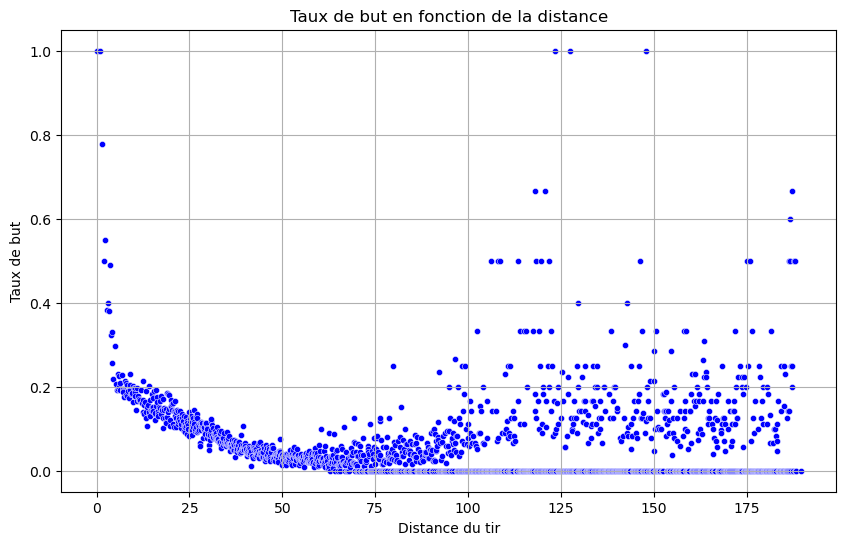

In [18]:
def scatterplot_2_variables(df, x, y, color, s, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, color=color, s=s, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

scatterplot_2_variables(df=df_distance_goal_rate, x='shotDistance', y='goalRate',color='blue', s=20, title='Taux de but en fonction de la distance', xlabel='Distance du tir', ylabel='Taux de but')

#### Le taux de but (buts / (buts + non-buts)) par angle

In [19]:
df_angle_goal_rate = train_data.groupby('shotAngle')['isGoal'].mean().reset_index()
df_angle_goal_rate.columns = ['shotAngle', 'goalRate']

df_angle_goal_rate

,shotAngle,goalRate
0,0.000000,0.181688
1,0.306392,0.000000
2,0.309704,0.000000
3,0.329282,0.000000
4,0.331186,0.000000
...,...,...
4665,159.443955,0.000000
4666,161.565051,1.000000
4667,171.869898,1.000000
4668,173.659808,0.000000


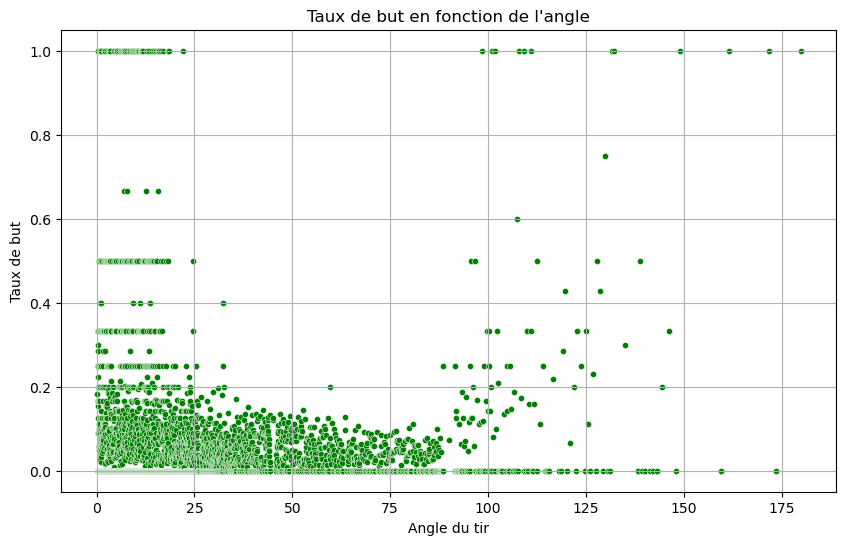

In [20]:
scatterplot_2_variables(df=df_angle_goal_rate, x='shotAngle', y='goalRate', color='green', s=20,
                        title='Taux de but en fonction de l\'angle', xlabel='Angle du tir', ylabel='Taux de but')

#### Question 2 : vaiables distance et angle binned(s)

In [21]:
# Regrouper les tirs par bins de distance
goal_stats_by_distance = train_data.groupby('shotDistance_bin', observed=True).agg(
    goals=('isGoal', 'sum'),
    total_shots=('isGoal', 'count')
)

# Calculer le taux de but
goal_stats_by_distance['goal_rate'] = goal_stats_by_distance['goals'] / goal_stats_by_distance['total_shots']

goal_stats_by_distance


,goals,total_shots,goal_rate
shotDistance_bin,,,
0-19,17017,97643,0.174278
20-39,9357,103385,0.090506
40-59,3360,93683,0.035866
60-79,522,20732,0.025178
80-99,190,5007,0.037947
100-119,78,1402,0.055635
120-139,111,1562,0.071063
140-159,116,1639,0.070775
160-179,129,1710,0.075439


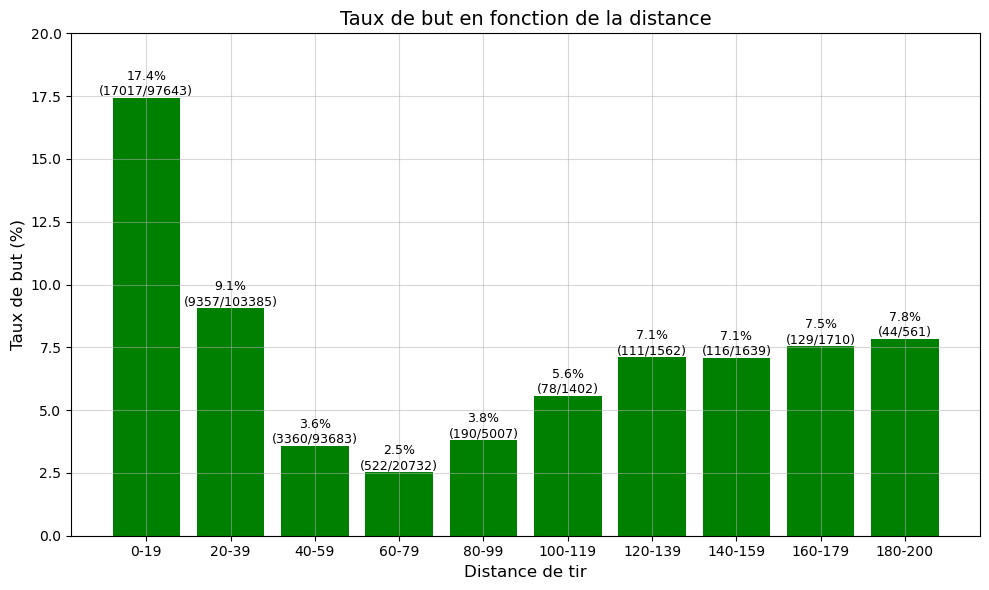

In [23]:
# Tracer la courbe
def plot_goal_rate(df, x, y, rate, rate_min, rate_max, plotTitle, title, fontSize, xlabel, sizeXlabel, ylabel, sizeYlabel):
    # Histogramme
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df[rate]*100, color='green', label=plotTitle)
    # Annoter les ratios sur les barres
    for bar, (_, row) in zip(bars, df.iterrows()):
        x_i = int(row[x])
        y_i = int(row[y])
        rate_i = row[rate]
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{rate_i*100:.1f}%\n({x_i}/{y_i})",
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )
    # Affiche le graphique
    plt.title(title, fontsize=fontSize)
    plt.xlabel(xlabel, fontsize=sizeXlabel)
    plt.ylabel(ylabel, fontsize=sizeYlabel)
    plt.ylim(rate_min, rate_max)  # Limiter l'axe Y
    plt.grid(alpha=0.5)
    # plt.legend()
    plt.tight_layout()
    plt.show()


plot_goal_rate(goal_stats_by_distance, 'goals', 'total_shots', 'goal_rate', 0, 20, 'Taux de but', 'Taux de but en fonction de la distance', 14, 'Distance de tir', 12, 'Taux de but (%)', 12)

In [24]:
# Regrouper les tirs par bins d'angle
goal_stats_by_angle = train_data.groupby('shotAngle_bin', observed=True).agg(
    goals=('isGoal', 'sum'),
    total_shots=('isGoal', 'count')
)

# Calculer le taux de but
goal_stats_by_angle['goal_rate'] = goal_stats_by_angle['goals'] / goal_stats_by_angle['total_shots']

goal_stats_by_angle

,goals,total_shots,goal_rate
shotAngle_bin,,,
0-19,11895,101941,0.116685
20-39,10248,124234,0.082489
40-59,5034,60070,0.083802
60-79,1674,25632,0.065309
80-99,292,5650,0.051681
100-119,94,570,0.164912
120-139,30,126,0.238095
140-159,3,19,0.157895
160-179,6,7,0.857143


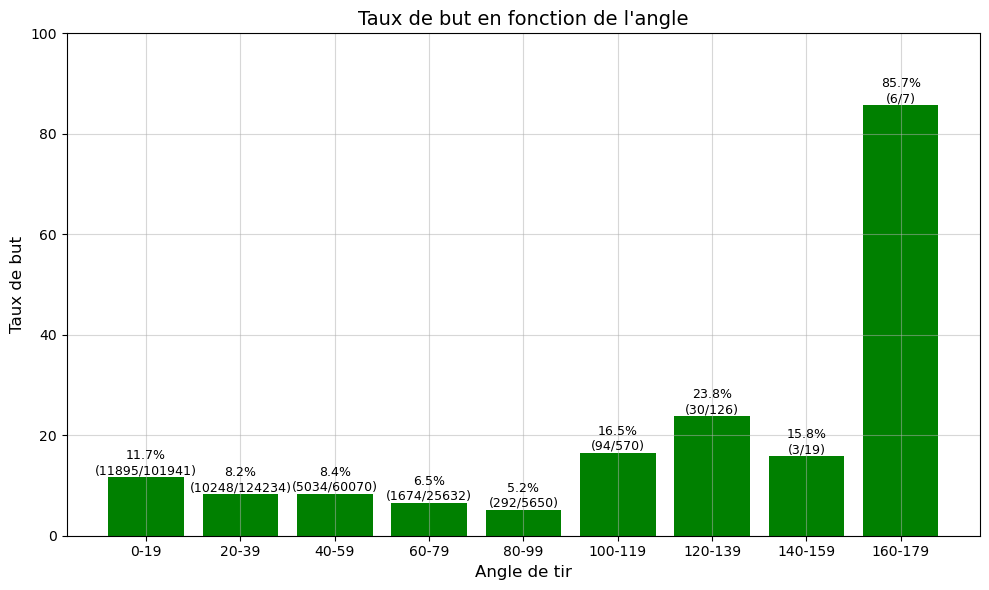

In [25]:
plot_goal_rate(goal_stats_by_angle, 'goals', 'total_shots','goal_rate', 0, 100, 'Taux de but', 'Taux de but en fonction de l\'angle', 14, 'Angle de tir', 12, 'Taux de but', 12)

## Question 3

In [ ]:
plot_goals_by_distance(train_data)

### Nombre de buts net non vides marqués depuis l'intérieur de la zone défensive

In [ ]:
filtered_data = train_data[
    (train_data['shotDistance'] > 90) & (train_data['typeDescKey'] == 'goal') & (train_data['emptyGoalNet'] == 0)]
len(filtered_data)

In [ ]:
filtered_data.loc[54362, :]

In [ ]:
# l'venement 54362 (filtered_data.loc[54362,:]) du match 2016020894 n'a pas les bonnes coordonées. 
# voir la vidéo: https://www.youtube.com/watch?v=lM6JXVW0-YY du match. le but de Mats Zuccarello en période de shoot-out
# est fait du coté droit, non du coté gauche

# l'evenemnt 80622 du match 2017020004 n'a pas les bonnes coordonées.
# voir la vidéo: https://www.youtube.com/watch?v=WpIGr7srlLY. le but de Kevin Labanc est du mauvais coté

# l'evenemnet 1806 n'a pas le bon zoneShoot/zoneCode. il a comme zoneShoot D (defensive) alors que quand on regarde le but de
# John Tavares, il le marque bien dans la zone offensive https://www.youtube.com/watch?v=MO7vAygX2_c

### Nombre de buts marqués depuis l'intérieur de la zone défensive

In [ ]:
filtered_data = train_data[(train_data['shotDistance'] > 90) & (train_data['typeDescKey'] == 'goal')]

grouped_df = filtered_data.groupby(['shotType']).count()

print(grouped_df['idGame'])

In [ ]:
filtered_data[filtered_data['shotType'] == 'wrap-around']

In [ ]:
# pour l'evenement 47255 du match 2016020779, le type de tir n'est pas correct car un wrap-around ne peut pas se faire aussi loin
# voir: https://www.nhl.com/gamecenter/pit-vs-stl/2017/02/04/2016020779/playbyplay
# video: https://www.youtube.com/watch?v=CHcbWHyRDbE. Sidney Crosby a bien tiré depuis la position (3,1). donc les coordonées et la distance sont 
# bonnes. Le type de tir n'est pas le bon. 

# video wrap-around: https://www.youtube.com/watch?v=tmRibUXW8RE

# Modèles de base

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

#### Préparation de la caractéristique et de la cible

In [27]:
# Préparation de la caractéristique et de la cible
X = train_data[['shotDistance']].dropna()
y = train_data['isGoal'][X.index]

In [28]:
# Vérification des types et absence de NaN
print(X.shape)
print(y.shape)
print("Type de X:", type(X))
print("Type de y:", type(y))
print("Valeurs manquantes dans X:", X.isnull().sum().sum())
print("Valeurs manquantes dans y:", y.isnull().sum())

(327325, 1)
(327325,)
Type de X: <class 'pandas.core.frame.DataFrame'>
Type de y: <class 'pandas.core.series.Series'>
Valeurs manquantes dans X: 0
Valeurs manquantes dans y: 0


In [31]:
# Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(261860, 1)
(261860,)
(65465, 1)
(65465,)


### Question 1

#### Entraîner le modèle

In [32]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

#### Prédiction et évaluation

In [33]:
# Prédiction et évaluation
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="macro")
print(f"Précision du modèle sur l'ensemble de validation: {accuracy:.2f}")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}")

Précision du modèle sur l'ensemble de validation: 0.91
F1-score du modèle sur l'ensemble de validation: 0.48


##### Analyse des résultats :
Précision globale :

Une précision élevée ne signifie pas nécessairement que le modèle est performant, surtout si les classes sont déséquilibrées (ex. : beaucoup plus de non-buts que de buts).
Problème potentiel :

La distance seule peut ne pas capturer suffisamment de complexité dans les données pour prédire efficacement si un tir est un but.
Un déséquilibre des classes pourrait conduire à un biais du modèle vers la classe majoritaire.

### Question 2

##### La courbe ROC est tracée avec le taux de vrais positifs (TPR) contre le taux de faux positifs (FPR). La métrique AUC (Area Under Curve) représente l’aire sous cette courbe.

In [34]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.calibration import CalibrationDisplay

In [35]:
# Probabilités pour la classe "but"
y_proba = clf.predict_proba(X_val)[:, 1]

# Calcul des ROC et AUC
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

In [36]:
# def plot_roc_curve_(fpr_, tpr_, roc_auc_, color_, label1, label2#, xmin_, xmax_, ymin_, ymax_
#                     ):
#     # Tracé de la courbe ROC
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr_ * 100, tpr_ * 100, color=color_, label = f"{label1} (AUC = {roc_auc_:.2f})")
#     plt.plot([0, 100], [0, 100], linestyle="--", color="gray", label=label2) # Ligne de base du classificateur aléatoire
#     plt.title("Courbe ROC", fontsize=14)
#     plt.xlabel("Taux de faux positifs- FPR (%)", fontsize=12)
#     # plt.xlim(xmin_,xmax_)
#     # plt.xlim(100,0)
#     plt.ylabel("Taux de vrais positifs- TPR (%)", fontsize=12)
#     # plt.ylim(ymin_,ymax_)
#     plt.legend(fontsize=12)
#     plt.grid(alpha=0.3)
#     plt.tight_layout()
#     plt.show()
#
# # Appel de la fonction
# plot_roc_curve_(fpr_=fpr, tpr_=tpr, roc_auc_=roc_auc, color_="blue", label1="Régression logistique", label2="Classificateur aléatoire"
#                 #, xmin_=100, xmax_=0, ymin_=0, ymax_=100
#                 )


##### Courbe ROC et AUC : La courbe ROC permet de visualiser le compromis entre les taux de vrais positifs et de faux positifs, et l'AUC fournit une mesure globale de la performance du modèle.

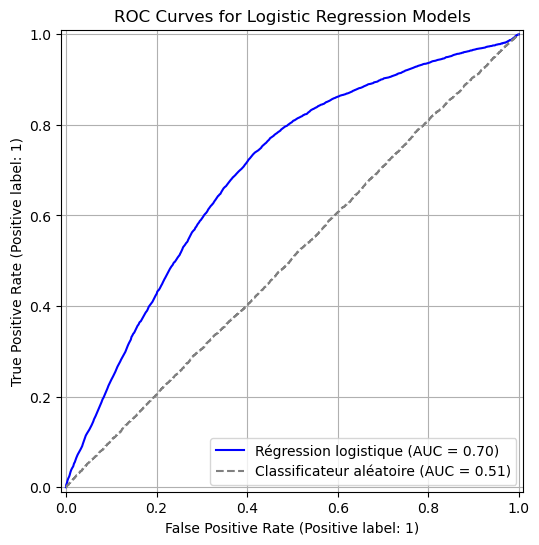

In [37]:
# Ligne de base aléatoire
y_proba_random = np.random.uniform(0, 1, len(y_val))
plt.figure(figsize=(10, 6))
# ROC
RocCurveDisplay.from_predictions(y_val, y_proba, name="Régression logistique", color="blue", ax=plt.gca())
RocCurveDisplay.from_predictions(y_val, y_proba_random, name="Classificateur aléatoire", color="gray", linestyle="--", ax=plt.gca())
plt.title("ROC Curves for Logistic Regression Models")
plt.grid(True)
plt.show()

#### b) Taux de buts par centile de probabilité

##### Cette courbe montre la capacité du modèle à prédire des buts en fonction de la probabilité qu'il attribue à chaque tir.
Pour tracer le taux de buts par centile de probabilité, nous devons analyser la proportion de tirs qui se sont effectivement transformés en buts dans chaque centile des probabilités prédites par le modèle.

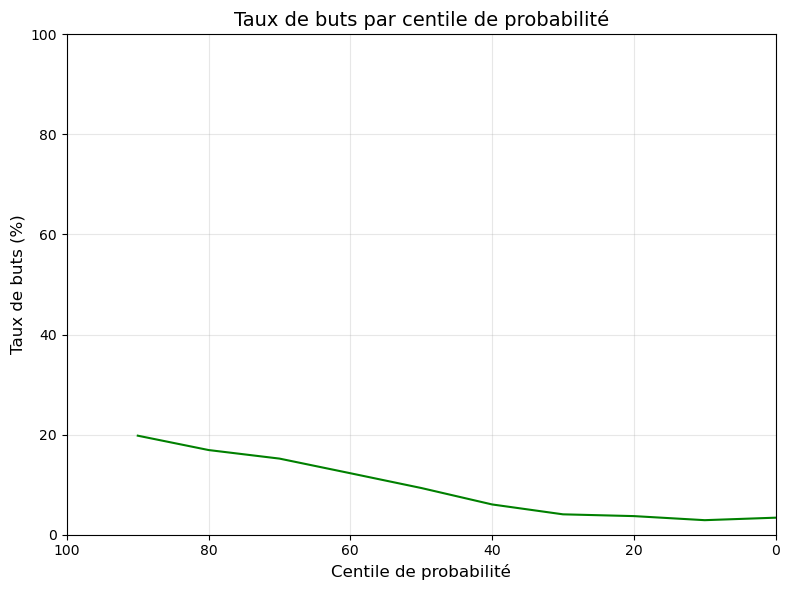

In [38]:
# b) Taux de buts par centile de probabilité
def compute_goal_rate_by_percentile(y_val, y_proba, percentiles):
    prob_bins = np.percentile(y_proba, percentiles)
    goal_rates = []

    for i in range(len(prob_bins) - 1):
        mask = (y_proba >= prob_bins[i]) & (y_proba < prob_bins[i + 1])
        goal_rates.append(y_val[mask].mean() * 100 if mask.sum() > 0 else 0)

    return goal_rates


percentiles = np.linspace(0, 100, 11)
goal_rates = compute_goal_rate_by_percentile(y_val, y_proba, percentiles)

def plot_line_2_variables(x, y, color, label, xinf, xsup, x_label="Centile de probabilité", y_label="Taux de buts (%)"):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='', color=color)
    plt.title(label=label, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.xlim(xinf,xsup)
    plt.ylabel(y_label, fontsize=12)
    plt.ylim(0,100)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_line_2_variables(x=percentiles[:-1], y=goal_rates, color='green', label="Taux de buts par centile de probabilité", xinf=100, xsup=0, x_label="Centile de probabilité", y_label="Taux de buts (%)")

##### Cette courbe montre la capacité du modèle à prédire des buts en fonction de la probabilité qu'il attribue à chaque tir.

#### c) La proportion cumulée de buts (pas de tirs) comme une fonction du centile de la probabilité de tir donnée par le modèle

##### Elle montre dans quelle mesure chaque modèle capture les buts les plus probables.

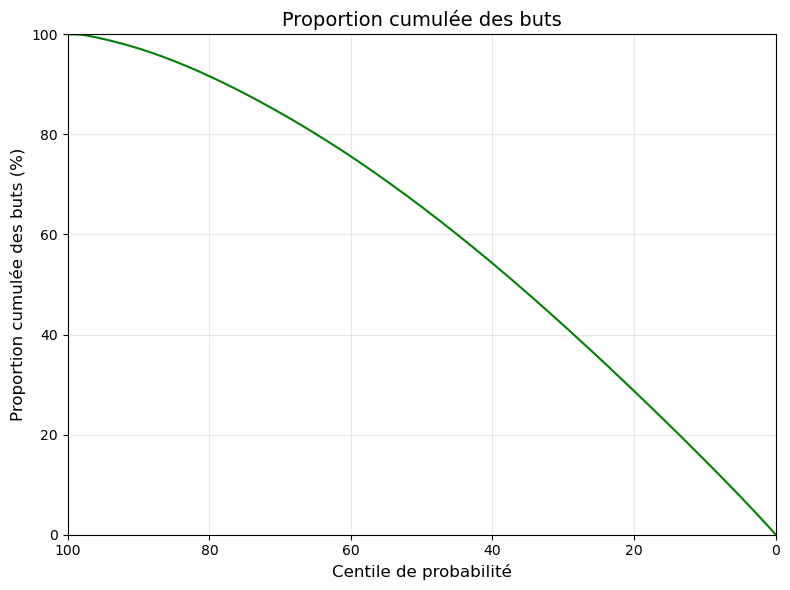

In [39]:
def compute_cumulative_goal_rate(y_val, y_proba):
    # Sélectionner uniquement les buts (classe positive)
    goal_indices = (y_val == 1)
    proba_goals = y_proba[goal_indices]

    # Trier les probabilités des vrais buts en ordre décroissant
    sorted_goal_proba = np.sort(proba_goals)[::-1]

    # Calculer la proportion cumulée
    cumulative_proportion = np.cumsum(sorted_goal_proba) * 100 / np.sum(sorted_goal_proba)

    return cumulative_proportion


cumulative_proportion = compute_cumulative_goal_rate(y_val, y_proba)
x_value = np.linspace(0, 100, len(cumulative_proportion))


plot_line_2_variables(x_value, cumulative_proportion, color="green", label="Proportion cumulée des buts", xinf=100, xsup=0, x_label="Centile de probabilité", y_label="Proportion cumulée des buts (%)")

#### d. Le diagramme de fiabilité (courbe de calibration)

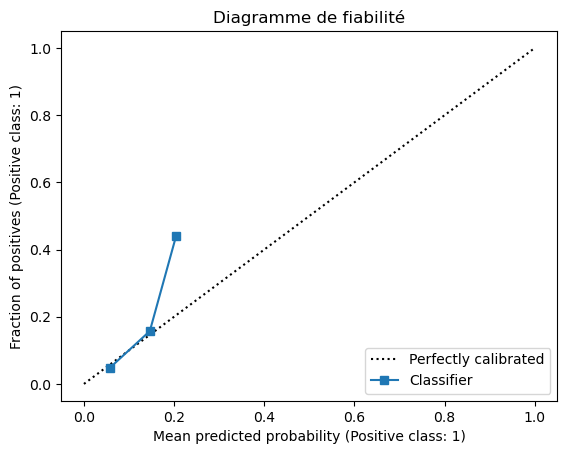

In [40]:
# 4. Diagramme de fiabilité
CalibrationDisplay.from_predictions(y_val, y_proba, n_bins=10)
plt.title("Diagramme de fiabilité")
plt.show()

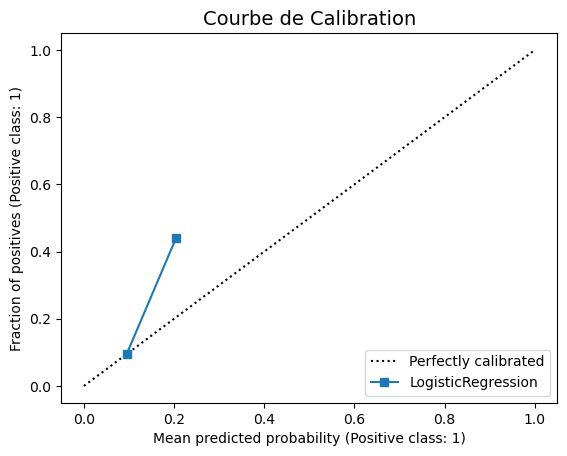

In [41]:
CalibrationDisplay.from_estimator(clf, X_val, y_val)
plt.title('Courbe de Calibration', fontsize=14)
plt.show()

#### Question 3 : Entrainement de deux autres classificateurs
- Distance seuelement
- Angle seulement
- Distance et angle

In [42]:
# Préparation de la caractéristique et de la cible
X_2 = train_data[['shotDistance', 'shotAngle']].dropna()
y_2 = train_data['isGoal'][X.index]

In [43]:
# Vérification des types et absence de NaN
print("Type de X:", type(X_2))
print("Type de y:", type(y_2))
print("Valeurs manquantes dans X:", X_2.isnull().sum().sum())
print("Valeurs manquantes dans y:", y_2.isnull().sum())

Type de X: <class 'pandas.core.frame.DataFrame'>
Type de y: <class 'pandas.core.series.Series'>
Valeurs manquantes dans X: 0
Valeurs manquantes dans y: 0


In [44]:
# Division des données en ensembles d'entraînement et de validation
X2_train, X2_val, y2_train, y2_val = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [45]:
# Charger les caractéristiques pour chaque ensemble de données
# La distance seulement
X2_distance_train = X2_train[['shotDistance']]
X2_distance_val = X2_val[['shotDistance']]
# L'angle seulement
X2_angle_train = X2_train[['shotAngle']]
X2_angle_val = X2_val[['shotAngle']]
# La distance et l'angle
X2_both_train = X2_train[['shotDistance','shotAngle']]
X2_both_val = X2_val[['shotDistance','shotAngle']]

In [46]:
print(X2_distance_train.shape)
print(X2_distance_val.shape)
print(X2_angle_train.shape)
print(X2_angle_val.shape)

(261860, 1)
(65465, 1)
(261860, 1)
(65465, 1)


In [47]:
# Entraînement des modèles
clf_distance = LogisticRegression().fit(X2_distance_train, y2_train)
clf_angle = LogisticRegression().fit(X2_angle_train, y2_train)
clf_both = LogisticRegression().fit(X2_both_train, y2_train)

# Probabilités prédites pour chaque modèle
y_proba_distance = clf_distance.predict_proba(X2_distance_val)[:, 1]
y_proba_angle = clf_angle.predict_proba(X2_angle_val)[:, 1]
y_proba_both = clf_both.predict_proba(X2_both_val)[:, 1]

# Ligne de base aléatoire
y2_proba_random = np.random.uniform(0, 1, len(y2_val))

##### a) Courbe ROC avec AUC

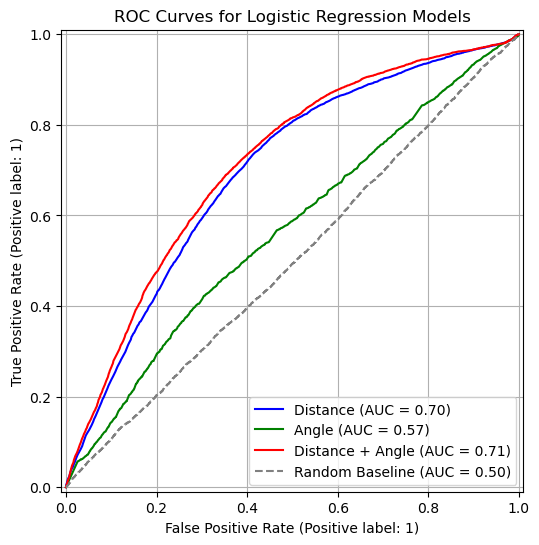

In [48]:
# Tracer les courbes ROC
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_predictions(y2_val, y_proba_distance, name="Distance", color="blue", ax=plt.gca())
RocCurveDisplay.from_predictions(y2_val, y_proba_angle, name="Angle", color="green", ax=plt.gca())
RocCurveDisplay.from_predictions(y2_val, y_proba_both, name="Distance + Angle", color="red", ax=plt.gca())
RocCurveDisplay.from_predictions(y2_val, y2_proba_random, name="Random Baseline", color="gray", linestyle="--", ax=plt.gca())

plt.title("ROC Curves for Logistic Regression Models")
plt.grid(True)
plt.show()

#### b) Taux de buts par centile

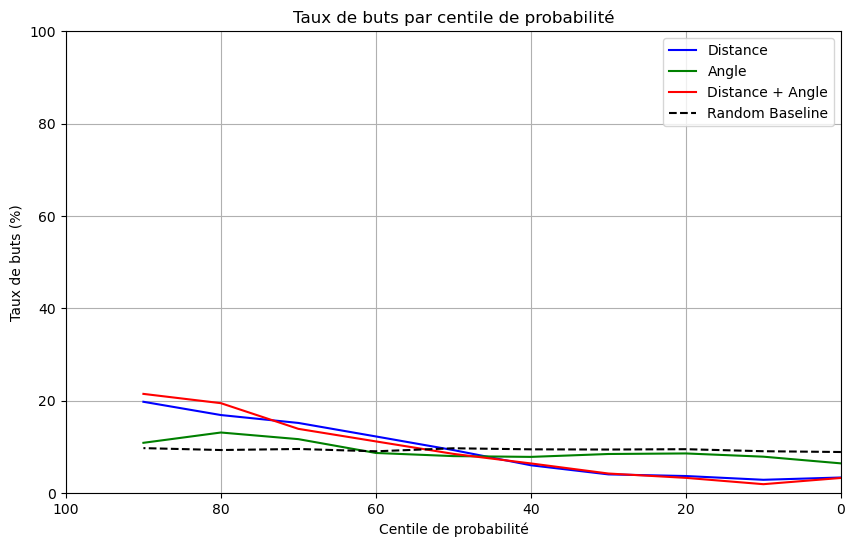

In [49]:
# Calculer les taux pour chaque modèle
# centiles = np.linspace(100, 0, 100)  # Centiles décroissants
goal_rate_distance = compute_goal_rate_by_percentile(y_val, y_proba_distance, percentiles)
goal_rate_angle = compute_goal_rate_by_percentile(y_val, y_proba_angle, percentiles)
goal_rate_both = compute_goal_rate_by_percentile(y_val, y_proba_both, percentiles)
goal_rate_random = compute_goal_rate_by_percentile(y_val, y_proba_random, percentiles)

# Tracer les taux de buts
plt.figure(figsize=(10, 6))
plt.plot(percentiles[:-1], goal_rate_distance, label="Distance", color="blue")
plt.plot(percentiles[:-1], goal_rate_angle, label="Angle", color="green")
plt.plot(percentiles[:-1], goal_rate_both, label="Distance + Angle", color="red")
plt.plot(percentiles[:-1], goal_rate_random, label="Random Baseline", color="black", linestyle="--")

plt.title("Taux de buts par centile de probabilité")
plt.xlabel("Centile de probabilité")
plt.xlim(100,0)
plt.ylabel("Taux de buts (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()


#### c) Proportion cumulée des buts par centile

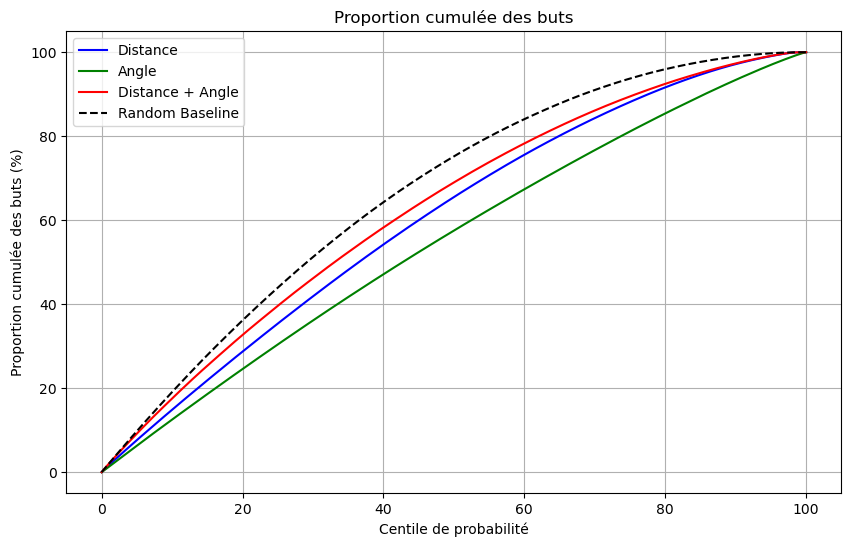

In [50]:
# Calculer les proportions cumulées pour chaque modèle
cumulative_goals_distance = compute_cumulative_goal_rate(y2_val, y_proba_distance)
cumulative_goals_angle = compute_cumulative_goal_rate(y2_val, y_proba_angle)
cumulative_goals_both = compute_cumulative_goal_rate(y2_val, y_proba_both)
cumulative_goals_random = compute_cumulative_goal_rate(y2_val, y2_proba_random)


# x_value = np.linspace(0, 100, len(cumulative_proportion))

# Tracer les proportions cumulées
plt.figure(figsize=(10, 6))
plt.plot(x_value, cumulative_goals_distance, label="Distance", color="blue")
plt.plot(x_value, cumulative_goals_angle, label="Angle", color="green")
plt.plot(x_value, cumulative_goals_both, label="Distance + Angle", color="red")
plt.plot(x_value, cumulative_goals_random, label="Random Baseline", color="black", linestyle="--")

plt.xlabel("Centile de probabilité")
plt.ylabel("Proportion cumulée des buts (%)")
plt.title("Proportion cumulée des buts")
plt.grid(True)
plt.legend()
plt.show()


#### Question 4: WandB

In [51]:
import wandb
import pickle
from sklearn.metrics import roc_auc_score

In [52]:
import os
os.environ["WANDB_DIR"] = "C:/DS_milestone2_wandb"
os.environ["WANDB_NOTEBOOK_NAME"] = "main_Milestone-2.ipynb"

#### wandb pour distance seulement

In [59]:
# Initialiser Wandb
wandb.init(
    project="youry_macius_milestone2",  # Nom du projet
    dir="C:/DS_milestone2_wandb",
    name="LogisticRegression_Distance",  # Nom de l'expérience
    tags=["logistic_regression", "distance_only"],  # Tags pour cette expérience
)

# Exemple : Entraîner le modèle
clf1 = LogisticRegression()
clf1.fit(X2_distance_train, y2_train)

# Évaluer le modèle (exemple avec AUC ROC)
y_proba1 = clf1.predict_proba(X2_distance_val)[:, 1]
auc_roc1 = roc_auc_score(y2_val, y_proba1)

# Enregistrer les métriques dans Wandb
wandb.log({"auc_roc": auc_roc1})

# Sauvegarder le modèle
model_path1 = "logistic_regression_distance.pkl"
with open(model_path1, "wb") as f:
    pickle.dump(clf1, f)

# Enregistrer le modèle dans Wandb
wandb.save(model_path1)

# Terminer l'expérience
wandb.finish()

auc_roc,▁
auc_roc,0.69648


OSError: [WinError 1314] A required privilege is not held by the client: 'C:\\Users\\maciu\\OneDrive - Universite de Montreal\\Documents\\1-UNIVERSITE DE MONTREAL\\1-COURS\\2- Automne 2024\\IFT6758 - Data Science\\1- IFT 6758 A\\4- Projet\\IFT6758-A11-Milestone2_14 Nov\\logistic_regression_distance.pkl' -> 'C:\\DS_milestone2_wandb\\wandb\\run-20241118_201343-b8czmv5n\\files\\logistic_regression_distance.pkl'

#### wandb pour angle seulement

In [62]:
# Initialiser Wandb
wandb.init(
    project="youry_macius_milestone2",
    dir="C:/DS_milestone2_wandb",
    name="LogisticRegression_Angle",  # Nom de l'expérience
    tags=["logistic_regression", "angle_only"],  # Tags pour cette expérience
)

# Exemple : Entraîner le modèle
clf2 = LogisticRegression()
clf2.fit(X2_angle_train, y2_train)

# Évaluer le modèle (exemple avec AUC ROC)
y_proba2 = clf2.predict_proba(X2_angle_val)[:, 1]
auc_roc2 = roc_auc_score(y2_val, y_proba2)

# Enregistrer les métriques dans Wandb
wandb.log({"auc_roc": auc_roc2})

# Sauvegarder le modèle
model_path2 = "logistic_regression_angle.pkl"
with open(model_path2, "wb") as f2:
    pickle.dump(clf2, f2)

# Enregistrer le modèle dans Wandb
wandb.save(model_path2)

# Terminer l'expérience
wandb.finish()

auc_roc,▁
auc_roc,0.5663


OSError: [WinError 1314] A required privilege is not held by the client: 'C:\\Users\\maciu\\OneDrive - Universite de Montreal\\Documents\\1-UNIVERSITE DE MONTREAL\\1-COURS\\2- Automne 2024\\IFT6758 - Data Science\\1- IFT 6758 A\\4- Projet\\IFT6758-A11-Milestone2_14 Nov\\logistic_regression_angle.pkl' -> 'C:\\DS_milestone2_wandb\\wandb\\run-20241118_201405-lx3pq2oz\\files\\logistic_regression_angle.pkl'

#### wandb: Distance et angle

In [68]:
# Initialiser Wandb
wandb.init(
    project="youry_macius_milestone2",
    dir="C:/DS_milestone2_wandb",
    name="LogisticRegression_Distance_Angle",  # Nom de l'expérience
    tags=["logistic_regression", "distance et angle"],  # Tags pour cette expérience
)

# Exemple : Entraîner le modèle
clf3 = LogisticRegression()
clf3.fit(X2_both_train, y2_train)

# Évaluer le modèle (exemple avec AUC ROC)
y_proba3 = clf3.predict_proba(X2_both_val)[:, 1]
auc_roc3 = roc_auc_score(y2_val, y_proba3)

# Enregistrer les métriques dans Wandb
wandb.log({"auc_roc": auc_roc3})

# Sauvegarder le modèle
model_path3 = "logistic_regression_distance_and_angle.pkl"
with open(model_path3, "wb") as f3:
    pickle.dump(clf3, f3)

# Enregistrer le modèle dans Wandb
wandb.save(model_path3)

# Terminer l'expérience
wandb.finish()

auc_roc,▁
auc_roc,0.7141


OSError: [WinError 1314] A required privilege is not held by the client: 'C:\\Users\\maciu\\OneDrive - Universite de Montreal\\Documents\\1-UNIVERSITE DE MONTREAL\\1-COURS\\2- Automne 2024\\IFT6758 - Data Science\\1- IFT 6758 A\\4- Projet\\IFT6758-A11-Milestone2_14 Nov\\logistic_regression_distance_and_angle.pkl' -> 'C:\\DS_milestone2_wandb\\wandb\\run-20241118_201542-8y8xp26m\\files\\logistic_regression_distance_and_angle.pkl'

# Ingénierie des caractéristiques II

### Ajout de l'artefact sur Wandb

In [ ]:
import wandb

# Connect to the Wandb API
api = wandb.Api()

# Spécifiez votre projet
project_name = "IFT6758.2024-A11"
entity = "youry-macius-universite-de-montreal"

try:
    artifact = api.artifact(f'{entity}/{project_name}/wpg_v_wsh_2017021065:latest')
    print("L'artefact existe déjà.")
except wandb.errors.CommError as e:
    run = wandb.init(project="IFT6758.2024-A11")

    # Create artefact
    artifact = wandb.Artifact(
        "wpg_v_wsh_2017021065",
        type="dataset"
    )

    # add data
    my_table = wandb.Table(dataframe=train_data[train_data['idGame'] == 2017021065])
    artifact.add(my_table, "wpg_v_wsh_2017021065")
    run.log_artifact(artifact)


# Faites de votre mieux!

### Implémentation des réseaux de neurones

In [ ]:
# Sélection des caractéristiques
characteristics = ['shotDistance', 'shotAngle', 'numberPeriod', 'gameSeconds'
                   ,'emptyGoalNet', 'offensivePressureTime', 'speedFromLastEvent', 'distanceFromLastEvent']

X = train_data[characteristics].dropna()
y = train_data['isGoal'][X.index]

# Chargement des données
config.INPUTS_DATA = X.to_numpy()
config.LABELS_DATA = y.to_numpy()

### Optimisation Perceptron

In [ ]:
# model_start.optimize("Perceptron") 

### Optimisation MLP 1 couche cachée

In [ ]:
#model_start.optimize("MLP_H1") 

### Optimisation 2 couches cachées

In [ ]:
#model_start.optimize("MLP_H2") 

# Évaluer sur l'ensemble de test

### Acquisition des données d'entraînement

In [ ]:
filename = './data/dataframe_2020_to_2021.csv'
start_year = 2020
end_year = 2021

if not os.path.isfile(filename):
    # Get the data from the NHL API (2020 - 2021)
    nhl_data_provider = get_data_from(start_year, end_year)

    # Clean the data
    clean_regular_season, clean_playoff = clean_data(nhl_data_provider)

    # Transform data into dataframe
    df_2020_to_2021 = convert_dictionaries_to_dataframes(clean_regular_season,
                                                         clean_playoff,
                                                         np.arange(start_year, end_year + 1).tolist())
    df_2020_to_2021.to_csv(filename, index=False)

### Récupération des données d'entraînement

In [ ]:
test_data = pd.read_csv(filename)

# Séparation des données de test en saison régulières et playoff
regular_test_data = test_data[test_data['gameType'] == "regular-season"].dropna()
playoff_test_data = test_data[test_data['gameType'] == "playoffs"].dropna()

## Prédiction pendant la saison régulière (2020-2021)

### Regression logistique

In [ ]:
#TODO: CODE ICI

### XGBoost

In [ ]:
#TODO: CODE ICI

### Préparation des données pour les réseaux de neurones

In [ ]:
# Chargement des données de test
X_regular = regular_test_data[characteristics]
y_regular = regular_test_data['isGoal'][X_regular.index]

# Ajout dans le fichier config.py :
config.TEST_DATA = X_regular.to_numpy()

### Perceptron

In [ ]:
y_pred = model_start.predict_data("Perceptron")
f1 = f1_score(y_pred, y_regular, average="macro")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}") 

### MLP 1 couche cachée

In [ ]:
y_pred = model_start.predict_data("MLP_H1")
f1 = f1_score(y_pred, y_regular, average="macro")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}") 

### MLP 2 couches cachées

In [ ]:
y_pred = model_start.predict_data("MLP_H2")
f1 = f1_score(y_pred, y_regular, average="macro")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}") 

## Prédiction pendant les Playoffs (2020-2021)

### Regression logistique

In [ ]:
#TODO: CODE ICI

### XGBoost

In [ ]:
#TODO: CODE ICI

### Préparation des données pour les réseaux de neurones

In [ ]:
# Chargement des données de test
X_playoff = playoff_test_data [characteristics]
y_playoff = playoff_test_data ['isGoal'][X_playoff.index]

# Ajout dans le fichier config.py :
config.TEST_DATA = X_playoff.to_numpy()

### Perceptron

In [ ]:
y_pred = model_start.predict_data("Perceptron")
f1 = f1_score(y_pred, y_playoff, average="macro")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}") 

### MLP 1 couche cachée

In [ ]:
y_pred = model_start.predict_data("MLP_H1")
f1 = f1_score(y_pred, y_playoff, average="macro")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}") 

### MLP 2 couches cachées

In [ ]:
y_pred = model_start.predict_data("MLP_H2")
f1 = f1_score(y_pred, y_playoff, average="macro")
print(f"F1-score du modèle sur l'ensemble de validation: {f1:.2f}") 